# IMAGE SEGMENTATION USING UNSUPERVISED GAUSSIAN MIXTURE MODEL (GMM) CLUSTERING

BSE Image

## 1. Importing Python Libraries

In [1]:
import numpy as np
import cv2

from sklearn.mixture import GaussianMixture as GMM

import matplotlib.pyplot as plt

print("Python Libraries Import Completed")

Python Libraries Import Completed


## 2. Importing the Image File

In [2]:
# Importing the Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Image
image3 = cv2.imread("/content/drive/MyDrive/~~~VP_Data_Science/DS_Real_Time_Projects/Image_Segmentation_Using_UnSupervised_Gaussian_Mixture_Model_GMM_Clustering/data/BSE.jpg")

print("Image Import Completed")

Image Import Completed


## 3. Image Exploration

In [4]:
# Displaying the Imported Image

image3

array([[[255, 255, 255],
        [251, 251, 251],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [254, 254, 254],
        [255, 255, 255]],

       [[251, 251, 251],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [248, 248, 248]],

       [[252, 252, 252],
        [251, 251, 251],
        [167, 167, 167],
        ...,
        [185, 185, 185],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[255, 255, 255],
        [254, 254, 254],
        [162, 162, 162],
        ...,
        [217, 217, 217],
        [252, 252, 252],
        [254, 254, 254]],

       [[246, 246, 246],
        [255, 255, 255],
        [250, 250, 250],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [253, 253, 253]],

       [[251, 251, 251],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [251, 251, 251],
        [253, 253, 253]]

In [5]:
# Verifying the Type of the Image

type(image3)

numpy.ndarray

In [6]:
# Verifying the Shape of the Image

image3.shape

(751, 1000, 3)

## 4. Image Pre-Processing (Reshaping)

In [8]:
# Reshaping the Image

#image3_reshape = image3.reshape(751, 1000, 3)
image3_reshape = image3.reshape((-1, 3))

print("Execution Completed")

Execution Completed


In [9]:
# Displaying the Reshaped Image
image3_reshape

array([[255, 255, 255],
       [251, 251, 251],
       [253, 253, 253],
       ...,
       [255, 255, 255],
       [251, 251, 251],
       [253, 253, 253]], dtype=uint8)

In [10]:
# Verifying the Type of the Reshaped Image

type(image3_reshape)

numpy.ndarray

In [11]:
# Verifying the Shape of the Reshaped Image

image3_reshape.shape

(751000, 3)

## 5. UnSupervised Clustering - Gaussian Mixture Model Fitting

### 5.1 GMM Clustering Initial Parameters Configuration

In [14]:
# GMM Parameters Initial Configuration

n_components = 5
covariance_type = "tied"
tol = 0.001
reg_covar = 0.000001
max_iter = 100
n_init = 1
init_params = "kmeans"
weights_init = None
means_init = None
precisions_init = None
random_state = None
warm_start = False
verbose = 0
verbose_interval = 10

print("Execution Completed")

Execution Completed


### 5.2 GMM Clustering Model Definition and Initiation

In [15]:
# Defining and Initiating an Instance of GMM Clustering Model

gmm_model = GMM(n_components=n_components, covariance_type=covariance_type, tol=tol, reg_covar=reg_covar, 
                 max_iter=max_iter, n_init=n_init, init_params=init_params, weights_init=weights_init, 
                 means_init=means_init, precisions_init=precisions_init, random_state=random_state, 
                 warm_start=warm_start, verbose=verbose, verbose_interval=verbose_interval)

print("Execution Completed")

Execution Completed


### 5.3 GMM Clustering Model Fitting

In [16]:
# Fitting the GMM Clustering Model

print("GMM Clustering Model Training Started...")

gmm_model.fit(image3_reshape)

print("GMM Clustering Model Training Completed...")

GMM Clustering Model Training Started...
GMM Clustering Model Training Completed...


### 5.3 GMM Clustering Model Predictions

In [17]:
# Evaluating the GMM Clustering Model Predictions

gmm_image3_predictions = gmm_model.predict(image3_reshape)

print("Execution Completed")

Execution Completed


In [18]:
# Displaying the Prediction Results

gmm_image3_predictions

array([1, 1, 1, ..., 1, 1, 1])

In [19]:
# verifying the Shape of the Predictions Array

gmm_image3_predictions.shape

(751000,)

### 5.4 Evaluating the Predictions Results

In [20]:
# Extracting the Original Image Shape before Reshaping
original_image3_shape = image3.shape

original_image3_shape

(751, 1000, 3)

In [21]:
original_image3_shape[0]

751

In [22]:
original_image3_shape[1]

1000

In [23]:
original_image3_shape[2]

3

In [24]:
# Reshaping the Original Image with the Predicted Cluster Labels

segmented_array3 = gmm_image3_predictions.reshape(original_image3_shape[0], original_image3_shape[1])

print("Execution Completed")

Execution Completed


In [25]:
# Displaying the Reshaped Segmented Array with Predictions 

segmented_array3

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 4, ..., 4, 1, 1],
       ...,
       [1, 1, 4, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [26]:
# Verifying the Shape of the Reshaped Segmented Array with Predictions 

segmented_array3.shape

(751, 1000)

In [27]:
# Verifying the First Data Instance of the Reshaped Segmented Array with Predictions 

segmented_array3[0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [28]:
# Verifying the Shape of the First Data Instance of the Reshaped Segmented Array with Predictions 

segmented_array3[0].shape

(1000,)

### 5.5 Visualizing the Segmented Image with Clusters

In [29]:
# Visualizing the Segmented Image

segmented_image3 = cv2.imwrite("/content/drive/MyDrive/~~~VP_Data_Science/DS_Real_Time_Projects/Image_Segmentation_Using_UnSupervised_Gaussian_Mixture_Model_GMM_Clustering/results/segmented_BSE.jpg", segmented_array3)

print("Segmented Image Export Completed")

Segmented Image Export Completed


## 6. Identification of the Optimal Number of Segments/Clusters (Hyper Parameters) Using AIC/BIC Methods

**AIC - Akaike Information Criterion**

AIC = -2/N * LL + 2 * k/N

where, 

*   **N** is the number of examples in the training dataset

*   **LL** is the log-likelihood of the model on the training dataset

*   **k** is the number of parameters in the model.

**BIC - Bayesian Information Criterion**

BIC = -2 * LL + log(N) * k

where, 
*   **log()** has the base-e called the natural logarithm
*   **LL** is the log-likelihood of the model
*   **N** is the number of examples in the training dataset of the model
*   **k** is the number of parameters in the model

### 6.1 AIC Method - GMM Clustering Model Configuration, Definition and Fitting

In [30]:
# GMM Clutering Model Parameters Configuration

# Number of Components/Segments/Clusters
n_components = np.arange(1, 10)

covariance_type = "tied"
tol = 0.001
reg_covar = 0.000001
max_iter = 100
n_init = 1
init_params = "kmeans"
weights_init = None
means_init = None
precisions_init = None
random_state = None
warm_start = False
verbose = 0
verbose_interval = 10

print("GMM Clustering Models Training For AIC Started...")

# GMM Clustering Models Definition and Fitting for Various Values of Components Ranging from 1 to 10
gmm_models_aic = [GMM(n_components=n, covariance_type=covariance_type, tol=tol, reg_covar=reg_covar, 
                      max_iter=max_iter, n_init=n_init, init_params=init_params, weights_init=weights_init, 
                      means_init=means_init, precisions_init=precisions_init, random_state=random_state, 
                      warm_start=warm_start, verbose=verbose, verbose_interval=verbose_interval).fit(image3_reshape) for n in n_components]

print("GMM Clustering Models Training For AIC Completed...")

GMM Clustering Models Training For AIC Started...
GMM Clustering Models Training For AIC Completed...


### 6.2 Displaying the GMM Clustering Models for Various Number of Components

In [31]:
# Displaying the GMM Clustering Models for Various Number of Components

gmm_models_aic

[GaussianMixture(covariance_type='tied'),
 GaussianMixture(covariance_type='tied', n_components=2),
 GaussianMixture(covariance_type='tied', n_components=3),
 GaussianMixture(covariance_type='tied', n_components=4),
 GaussianMixture(covariance_type='tied', n_components=5),
 GaussianMixture(covariance_type='tied', n_components=6),
 GaussianMixture(covariance_type='tied', n_components=7),
 GaussianMixture(covariance_type='tied', n_components=8),
 GaussianMixture(covariance_type='tied', n_components=9)]

### 6.3a Method 1 : Displaying the AIC Values Computed for Various Number of Components

In [32]:
# Method 1 : Displaying the AIC Values Computed for Various Number of Components

# Creating an Empty List to Hold the AIC Values for the various Number of Components
aic_list = []

for m in gmm_models_aic:
  aic_value = m.aic(image3_reshape)
  aic_list.append(aic_value)

# Displaying the List of AIC Values Computed for the various Number of Components
aic_list

[-8801749.498278813,
 -8988729.40032883,
 -9574937.413148759,
 -9739248.387891244,
 -9927209.537366437,
 -9997886.318677211,
 -9997629.365557076,
 -10198692.731702276,
 -10221127.084551424]

### 6.3b Method 2 : Displaying the AIC Values Computed for Various Number of Components

In [33]:
# Method 2 : Using List Comprehension - Displaying the AIC Values Computed for Various Number of Components

aic_list_method2 = [m.aic(image3_reshape) for m in gmm_models_aic]

# Displaying the List of AIC Values Computed for the various Number of Components
aic_list_method2

[-8801749.498278813,
 -8988729.40032883,
 -9574937.413148759,
 -9739248.387891244,
 -9927209.537366437,
 -9997886.318677211,
 -9997629.365557076,
 -10198692.731702276,
 -10221127.084551424]

### 6.4 AIC Method - GMM Clustering Models - Visualising AIC Values for Various Number of Components

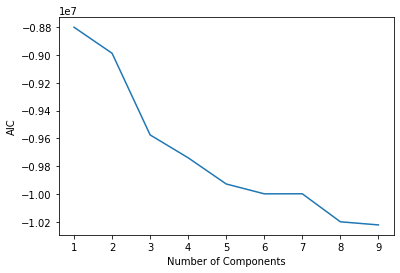

In [35]:
# Visualising AIC Values for Various Number of Components

plt.plot(n_components, aic_list, label='GMM Clustering Model : Number of Components versus AIC')
plt.xlabel('Number of Components')
plt.ylabel("AIC")

# Displaying the Plot Graph
plt.show()

As we can see from the above AIC results; the optimal number of components can be considered as either 5 or 6.

As we have already executed the model with 5 components in the previous section; let's proceed executing with 6 Components/Segments/Clusters as the optimal finalized GMM Clustering Model for illustration purposes.

## 7. GMM Clustering Optimal Finalized Model Implementation

### 7.1 GMM Clustering Optimal Finalized Model Configuration, Definition and Fitting

In [36]:
# GMM Clustering Optimal Finalized Model Configuration, Definition and Fitting

# GMM Clutering Model Parameters Configuration

# Optimal Finalized Number of Components/Segments/Clusters Identified Using the AIC Method
n_components = 6

covariance_type = "tied"
tol = 0.001
reg_covar = 0.000001
max_iter = 100
n_init = 1
init_params = "kmeans"
weights_init = None
means_init = None
precisions_init = None
random_state = None
warm_start = False
verbose = 0
verbose_interval = 10

print("GMM Clustering Optimal Model Training For AIC Started...")

# GMM Clustering Optimal Finalized Model Definition
gmm_model_optimal = GMM(n_components=n_components, covariance_type=covariance_type, tol=tol, reg_covar=reg_covar, 
                        max_iter=max_iter, n_init=n_init, init_params=init_params, weights_init=weights_init, 
                        means_init=means_init, precisions_init=precisions_init, random_state=random_state, 
                        warm_start=warm_start, verbose=verbose, verbose_interval=verbose_interval)

# GMM Clustering Optimal Finalized Model Fitting
gmm_model_optimal.fit(image3_reshape)

print("GMM Clustering Optimal Model Training For AIC Completed...")

GMM Clustering Optimal Model Training For AIC Started...
GMM Clustering Optimal Model Training For AIC Completed...


### 7.2 GMM Clustering Optimal Finalized Model Predictions

In [37]:
# Evaluating the Predictions of the GMM Clustering Optimal Finalized Model

gmm_image3_optimal_predictions = gmm_model_optimal.predict(image3_reshape)

print("Execution Completed")

Execution Completed


In [38]:
# Displaying the Predictions of the GMM Clustering Optimal Finalized Model

gmm_image3_optimal_predictions

array([2, 2, 2, ..., 2, 2, 2])

### 7.3 Reshaping the Original Image with the Predicted Cluster Labels of the Optimal Finalized GMM Clustering Model

In [39]:
# Reshaping the Original Image with the Predicted Cluster Labels of the Optimal Finalized GMM Clustering Model

segmented_array3_optimal = gmm_image3_optimal_predictions.reshape(original_image3_shape[0], original_image3_shape[1])

# Displaying the Segmented Array with Predictions of the Optimal Finalized GMM Clustering Model
segmented_array3_optimal

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 0, ..., 0, 2, 2],
       ...,
       [2, 2, 0, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

In [40]:
# Verifying the Shape of the Segmented Array with Predictions of the Optimal Finalized GMM Clustering Model

segmented_array3_optimal.shape

(751, 1000)

In [41]:
# Verifying the First Data Instance of the Segmented Array with Predictions of the Optimal Finalized GMM Clustering Model

segmented_array3_optimal[0]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [42]:
# Verifying the Shape of the First Data Instance of the Segmented Array with Predictions of the Optimal Finalized GMM Clustering Model

segmented_array3_optimal[0].shape

(1000,)

### 7.4 Visualizing the Segmented Image with Clusters for the Optimal Finalized GMM Clustering Model

In [43]:
# Visualizing the Segmented Image with Clusters for the Optimal Finalized GMM Clustering Model

segmented_image3_optimal = cv2.imwrite("/content/drive/MyDrive/~~~VP_Data_Science/DS_Real_Time_Projects/Image_Segmentation_Using_UnSupervised_Gaussian_Mixture_Model_GMM_Clustering/results/segmented_optimal_BSE.jpg", segmented_array3_optimal)

print("Optimal Segmented Image Export Completed")

Optimal Segmented Image Export Completed


Based on the comparison between the optimal number of components either as 5 or 6; it is observed that the segmented image with 5 components appears to be segmented much closer to the original image when compared with that of the segmented image with 6 components.

Hence we can conclude the optimal finalized number of components/segments/clusters as 5 which best represents the original image.